In [2]:
import numpy as np #maejo de arreglos algebra lineal
import pandas as pd #manejo dataframes tipo datos
import matplotlib.pyplot as plt #graficas
import seaborn as sns #graficas estadísticas
import random

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQs7acVB35L3qigzmd3kFpA77hxVqdQq-s2qK-h3AMahFlmskTTpvNcjBx8WxzTb2etvA1gsofgoW8w/pub?output=csv"
x_ = pd.read_csv(url)
x_ = x_.values

In [4]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42) #se crea un objeto kmeans con las propiedades del algoritmo
clusters = kmeans.fit_predict(x_) # Asingando los datos y otorgandoles etiquetas (4, por número de clusters)
##Investigar método del codo

In [5]:
from sklearn.decomposition import PCA
#Crear un objeto PCA (Principal Component Analysis) y ajustar los datos
pca = PCA(n_components=3) #Queremos las tres primeras componentes principales
x_pca = pca.fit_transform(x_)

In [6]:
# Definir distancia euclidiana como func
def distancia_euclideana(datos,centroides):
  return np.sqrt(np.sum((datos-centroides)**2))

## Paso 1: Número de Clusters
k = 4 # Por heurística datos y método del codo

## Paso 2: Elección de Centroides
dimension = x_.shape[0] #número de filas
centroids = x_[random.sample(range(dimension),k)]

# Almacenamiento de etiquetas
clusters_manuales = np.zeros(dimension) #Para asignar los valores de cada jugador a un centroide (el más cercano)

# Almacenamiento de distancias
distancias = np.zeros((dimension, k)) #Mide la distancia de cada dato de cada Jugador hacia cada centroide

## Paso 3: Implementación del método y criterios de convergencia
tolerancia = 1e-6
error = 100

#Repetir hasta que los centroides dejen

while error > tolerancia:
  for i in range(dimension): #por cada fila (jugador)
    for j in range(k): #por cada columna
      distancias[i,j] = distancias[i,j] = distancia_euclideana(x_[i], centroids[j])
    clusters_manuales[i] = np.argmin(distancias[i])

  centroids_prev = np.copy(centroids) # Crear variable auxiliar para comparar los centriodes actuales con los anteriores

  #Actualizamos los centroides
  for l in range(k): #Iteramos sobre los clusters
    puntos_cluster = x_[clusters_manuales == l] #Obtenemos todas las etiquetas iguales a l
    #El cluster puede llegar a estar vacío, entonces
    if len(puntos_cluster) > 0:
      centroids[l] = np.mean(puntos_cluster, axis=0)  ### Promedia los puntos que pertenecen al cluster, columna por columna
    else:
      print(f"Cluster {l} vacío, reasignando centroide aleatoriamente")
      centroids[l] = x_[np.random.choice(dimension)]

  # Calcular el error como el cambio promedio en los centroides
  error = np.mean([distancia_euclideana(centroids[l], centroids_prev[l]) for l in range(k)])
  print(error)

#Kmeans++ :: init= "kmeans++"
## paso 1 Numero de Clusters

54.594838097013934
37.38996591974838
10.583779349471474
2.971940164401112
1.5319603430941293
0.7250186633460535
0.5003203769964335
0.32686753493953435
0.1833679578502591
0.14184770201665195
0.11368338538732774
0.11347597049615915
0.09319113534834556
0.07161053349703851
0.04369569449874644
0.030557445146702823
0.01811296597406203
0.016452641290637456
0.01601597345262286
0.019178297807131265
0.021746862764868223
0.015496204816764041
0.007280523380566336
0.0


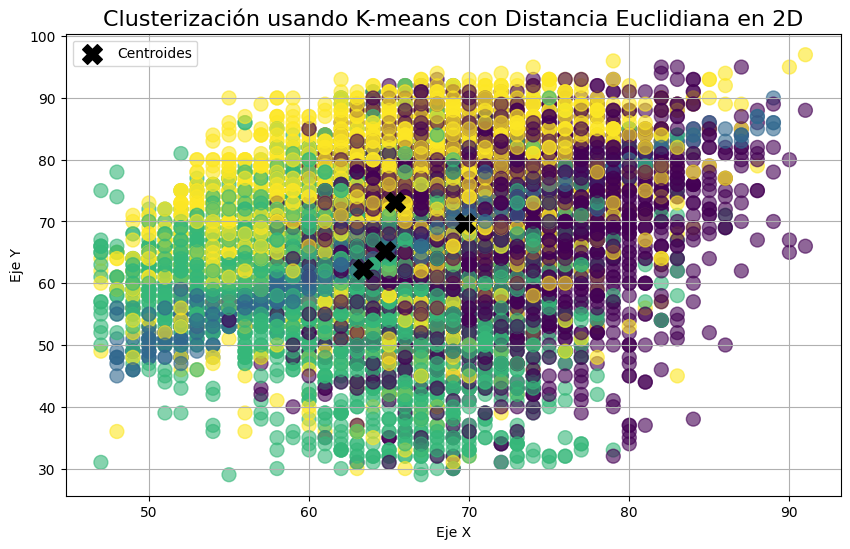

In [8]:
import warnings

def distancia_euclideana(datos, centroide):
    return np.sqrt(np.sum((datos - centroide) ** 2))

# Inicialización de K-means
k = 4  # Número de clusters
dimension = x_.shape[0]
centroids = x_[random.sample(range(dimension), k)]  # Centroides iniciales
clusters_manuales = np.zeros(dimension)  # etiquetas de clusters
distancias = np.zeros((dimension, k))  # almacenamiento de distancias
tolerancia = 1e-6
error = 100

# algoritmo de K-means
while error > tolerancia:
    for i in range(dimension):  # para cada fila (dato)
        for j in range(k):  # para cada centroide
            distancias[i, j] = distancia_euclideana(x_[i], centroids[j])
        clusters_manuales[i] = np.argmin(distancias[i])  # asignar al cluster más cercano

    centroids_prev = np.copy(centroids)  # guardamos los centroides anteriores
    for l in range(k):  # para cada cluster
        puntos_cluster = x_[clusters_manuales == l]  # puntos pertenecientes a este cluster
        if len(puntos_cluster) > 0:
            centroids[l] = np.mean(puntos_cluster, axis=0)  # recalcular el centroide
        else:
            centroids[l] = x_[np.random.choice(dimension)]  # si el cluster está vacío, asignamos un nuevo centroide aleatorio

    # Calcular el error promedio en los centroides
    error = np.mean([distancia_euclideana(centroids[l], centroids_prev[l]) for l in range(k)])

def graficar_clusters_2D(datos, clusters, centroides):
    plt.figure(figsize=(10, 6))
    plt.scatter(datos[:, 0], datos[:, 1], c=clusters, cmap='viridis', alpha=0.6, s=100)
    plt.scatter(centroides[:, 0], centroides[:, 1], c='black', s=200, marker='X', label='Centroides')
    plt.title('Clusterización usando K-means con Distancia Euclidiana en 2D', fontsize=16)
    plt.xlabel('Eje X')
    plt.ylabel('Eje Y')
    plt.legend()
    plt.grid(True)
    plt.show()

graficar_clusters_2D(x_, clusters_manuales, centroids)

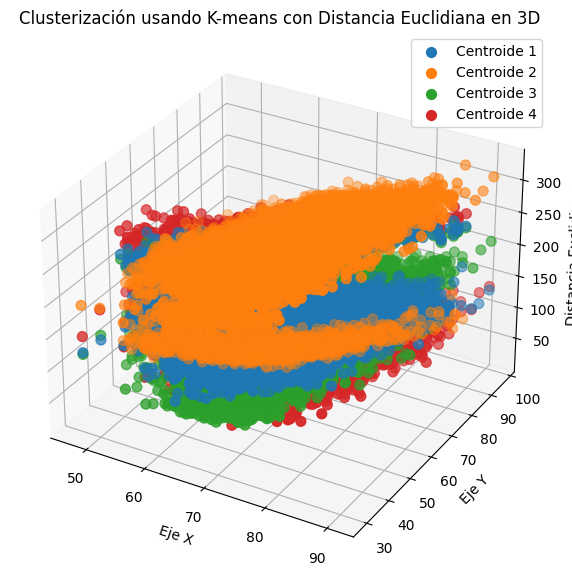

In [11]:
import warnings
from mpl_toolkits.mplot3d import Axes3D

def distancia_euclideana(datos, centroides):
   return np.sqrt(np.sum((datos - centroides) ** 2))

# inicialización de K-means
k = 4  # #de clusters
dimension = x_.shape[0]
centroids = x_[random.sample(range(dimension), k)]  # centroides iniciales
clusters_manuales = np.zeros(dimension)  # etiquetas de clusters
distancias = np.zeros((dimension, k))  # almacenamiento de distancias
tolerancia = 1e-6
error = 100

# algoritmo de K-means
while error > tolerancia:
    for i in range(dimension):  # para cada fila
        for j in range(k):  # para cada centroide
          distancias[i, j] = distancia_euclideana(x_[i], centroids[j])
        clusters_manuales[i] = np.argmin(distancias[i])

    centroids_prev = np.copy(centroids)  # guardamos los centroides anteriores
    for l in range(k):  # para cada cluster
        puntos_cluster = x_[clusters_manuales == l]
        if len(puntos_cluster) > 0:
            centroids[l] = np.mean(puntos_cluster, axis=0)
        else:
            centroids[l] = x_[np.random.choice(dimension)]

# calcular el error promedio en los centroides
    error = np.mean([distancia_euclideana(centroids[l], centroids_prev[l]) for l in range(k)])

def graficar_distancias_euclideanas_3D(datos, centroides):
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

 # recorrer cada centroide
    for i, centroide in enumerate(centroides):
        # calcular las distancias euclidianas desde cada dato al centroide actual
        distancias = np.sqrt(np.sum((datos - centroide) ** 2, axis=1))
 # graficar los datos y sus distancias
        ax.scatter(datos[:, 0], datos[:, 1], distancias, label=f'Centroide {i+1}', s=50)
    ax.set_title('Clusterización usando K-means con Distancia Euclidiana en 3D')
    ax.set_xlabel('Eje X')
    ax.set_ylabel('Eje Y')
    ax.set_zlabel('Distancia Euclidiana')
    plt.legend()
    plt.show()

graficar_distancias_euclideanas_3D(x_, centroids)